# Solar Cycle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
%matplotlib inline

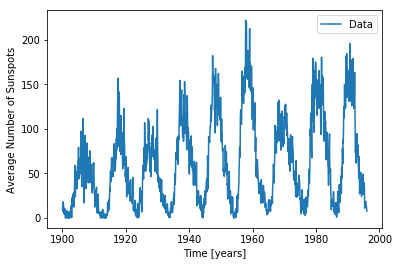

In [2]:
data = np.loadtxt('../data/solar/monthrg.dat')

date = data[:,0] + data[:,1]/12.0
spots = data[:,3]
ii = date>1900

date = date[ii]
spots = spots[ii]

plt.figure()
plt.plot(date, spots, label="Data")
plt.xlabel("Time [years]")
plt.ylabel("Average Number of Sunspots")
plt.legend()

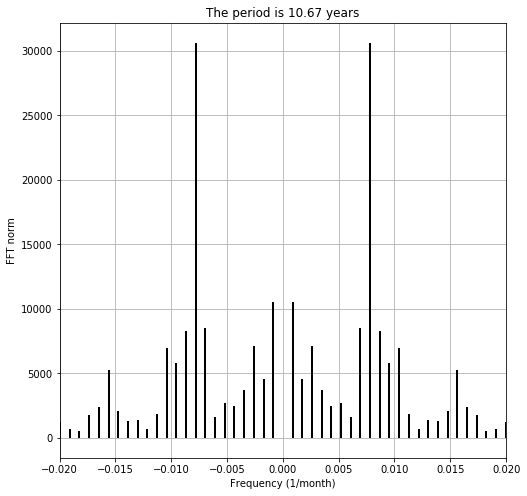

In [3]:
# we substract the mean to void having a high value for the zero frequency in the Fourier Transform
spots = spots - np.mean(spots) 

n_points = len(spots)
fft_spots = scipy.fftpack.fft(spots)

# Compute the norm of the fft values
fft_norm = np.abs(fft_spots)

# The one corresponds to 1 month, so that the frequency is in units of 1/month
frequency = scipy.fftpack.fftfreq(n_points, 1) 

# Get the place where the norm is the maximum
ii = np.argmax(fft_norm)

# The period is 1/frequency (in months) and then 1/12 to conver to years.
periodo_year = (1/frequency[ii])/12.0

plt.figure(figsize=(8,8))
plt.vlines(frequency, np.zeros(n_points), fft_norm, linewidth=2)
plt.title(r"The period is {:.2f} years".format(periodo_year))
plt.xlim([-0.02, 0.02])
plt.xlabel('Frequency (1/month)')
plt.ylabel('FFT norm')
plt.grid()